# Career Recommendation System

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("D:\\VIT\\5th SEM\\CSE4020\\Project\\survey_final.csv")
dataset.head()

,Perc 10,Stream,Perc 11,Perc 12,Drawing arts,Sports,GoodIn sports,Coding,Patriotism,Com skill,Sing dance,Read write,Nego skill,Hobby,Career field
0,96.0,Science(PCM),86.0,90.0,Yes,Yes,Yes,Yes,100,80,No,4,60,Sports,Defense Services
1,78.0,Commerce,89.0,90.0,Yes,No,No,No,75,80,No,4,80,Reading,Finance
2,89.6,Science(PCM),67.0,87.3,Yes,No,No,Yes,60,80,Yes,4,70,singing,Engineering
3,90.0,Science(PCMB),84.0,91.0,Yes,Yes,No,No,85,95,No,3,80,Reading,Engineering
4,56.0,Arts/Humanities,59.0,75.0,No,No,No,No,70,80,Yes,4,65,singing,Music/Dance


In [3]:
dataset.columns=[c.replace(' ', '_') for c in dataset.columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Perc_10        59 non-null     float64
 1   Stream         59 non-null     object 
 2   Perc_11        59 non-null     float64
 3   Perc_12        59 non-null     float64
 4   Drawing_arts   59 non-null     object 
 5   Sports         59 non-null     object 
 6   GoodIn_sports  59 non-null     object 
 7   Coding         59 non-null     object 
 8   Patriotism     59 non-null     int64  
 9   Com_skill      59 non-null     int64  
 10  Sing_dance     59 non-null     object 
 11  Read_write     59 non-null     int64  
 12  Nego_skill     59 non-null     int64  
 13  Hobby          59 non-null     object 
 14  Career_field   59 non-null     object 
dtypes: float64(3), int64(4), object(8)
memory usage: 7.0+ KB


In [5]:
df=dataset

### One hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [7]:
#for Stream
names=df.Stream.unique()
names.sort()
X = enc.fit_transform(df.Stream.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Stream_"+str(i) for i in names]) 
data = pd.concat([df, dfOneHot], axis=1)
#droping the column 
data= data.drop(['Stream'], axis=1)
#data.head()
df=data

In [8]:
#for Hobby
names=df.Hobby.unique()
names.sort()
X = enc.fit_transform(df.Hobby.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Hobby_"+str(i) for i in names]) 
data = pd.concat([df, dfOneHot], axis=1)
#droping the column 
data= data.drop(['Hobby'], axis=1)
#data.head()
df=data

In [9]:
#for Drawing__arts,Sports,coding,sing_dance
tags={'Yes':1,
   'No':0}
df=df.replace({'Drawing_arts':tags,'Sports':tags,'GoodIn_sports':tags,'Coding':tags,'Sing_dance':tags})

In [10]:
df.head()

,Perc_10,Perc_11,Perc_12,Drawing_arts,Sports,GoodIn_sports,Coding,Patriotism,Com_skill,Sing_dance,...,Hobby_Biking,Hobby_Coding,Hobby_Dancing,Hobby_Drawing,Hobby_Helping nature,Hobby_Numismatics,Hobby_Playing Video games,Hobby_Reading,Hobby_Sports,Hobby_singing
0,96.0,86.0,90.0,1,1,1,1,100,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,78.0,89.0,90.0,1,0,0,0,75,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,89.6,67.0,87.3,1,0,0,1,60,80,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,90.0,84.0,91.0,1,1,0,0,85,95,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56.0,59.0,75.0,0,0,0,0,70,80,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train test split

In [11]:
x=df.iloc[:,df.columns!='Career_field']
y=df.Career_field

In [12]:
x.head()

,Perc_10,Perc_11,Perc_12,Drawing_arts,Sports,GoodIn_sports,Coding,Patriotism,Com_skill,Sing_dance,...,Hobby_Biking,Hobby_Coding,Hobby_Dancing,Hobby_Drawing,Hobby_Helping nature,Hobby_Numismatics,Hobby_Playing Video games,Hobby_Reading,Hobby_Sports,Hobby_singing
0,96.0,86.0,90.0,1,1,1,1,100,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,78.0,89.0,90.0,1,0,0,0,75,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,89.6,67.0,87.3,1,0,0,1,60,80,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,90.0,84.0,91.0,1,1,0,0,85,95,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56.0,59.0,75.0,0,0,0,0,70,80,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
y.head()

0    Defense Services
1             Finance
2         Engineering
3         Engineering
4         Music/Dance
Name: Career_field, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

### Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [16]:
tree=DecisionTreeClassifier(criterion='entropy')

In [17]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

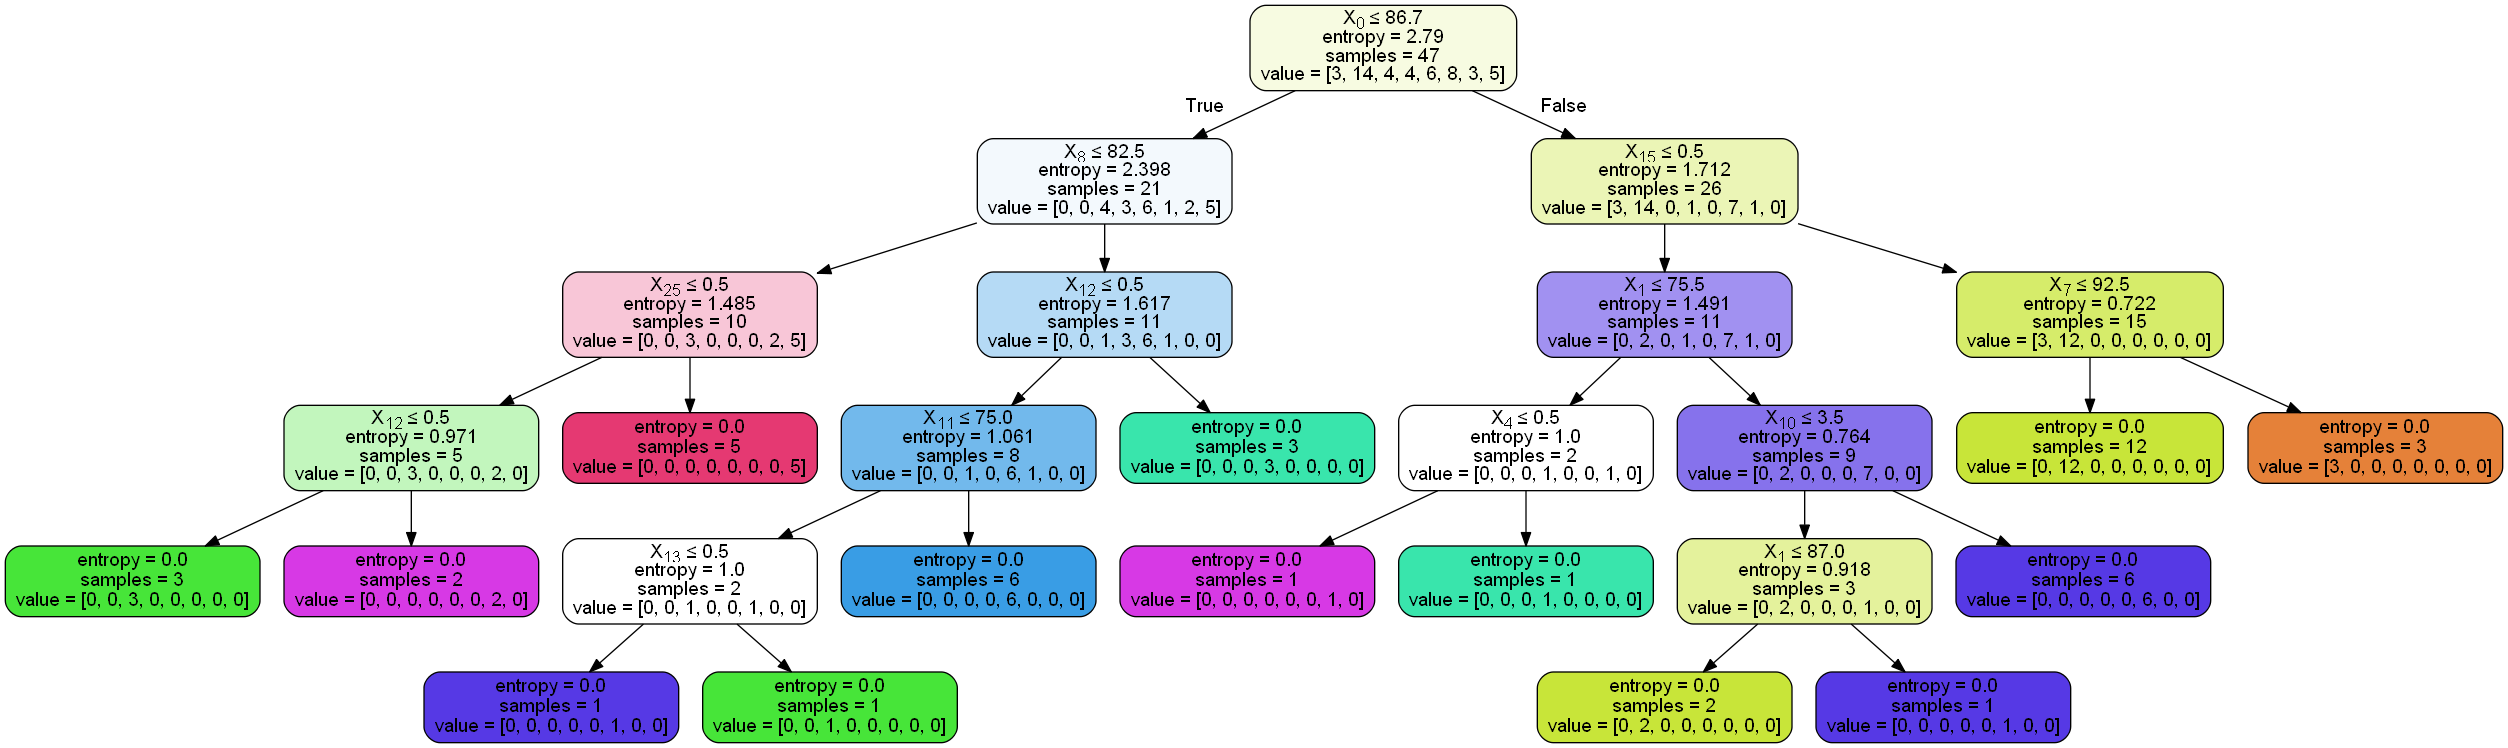

In [18]:
#printing the tree
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\manav\anaconda3\Library\bin\graphviz'
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=1000, height=2000)

In [19]:
#predicting
y_predict=tree.predict(x_test)

### Accuracy

In [20]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.75


### Oversampling

In [21]:
# SMOTE can't be performed here due to less data available, because n_neighbors<=n_samples for the target
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [22]:
# from collections import Counter
# print('Before smote:',Counter(y_train))
# print('After smote:',Counter(y_train_smote))

In [23]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_osamp,y_osamp=ros.fit_resample(x_train,y_train)
print('Before oversampling: ',Counter(y_train))
print('After oversampling: ',Counter(y_osamp))

Before oversampling:  Counter({'Engineering': 14, 'Medical': 8, 'Marketing': 6, 'Sports': 5, 'Finance': 4, 'Law': 4, 'Defense Services': 3, 'Music/Dance': 3})
After oversampling:  Counter({'Sports': 14, 'Defense Services': 14, 'Marketing': 14, 'Medical': 14, 'Finance': 14, 'Engineering': 14, 'Law': 14, 'Music/Dance': 14})


In [24]:
tree.fit(x_osamp,y_osamp)
y_predict=tree.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict))

0.75


### Stacking

In [25]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict=nb.predict(x_test)

In [26]:
print(metrics.accuracy_score(y_test,y_predict))

0.8333333333333334


In [27]:
level0=[('dt',DecisionTreeClassifier()),
       ('nb',GaussianNB())]
#level 1
from sklearn.linear_model import LogisticRegression
level1=LogisticRegression()
from sklearn.ensemble import StackingClassifier

# for k=3,5,10
k=[3,5,10]
for i in k:
    stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=i)
    stack.fit(x_train,y_train)
    #predict=stack.predict(x_test)
    #print(metrics.accuracy_score(predict,y_test))
    print('For k=',i)
    print('Accuracy:',stack.score(x_test,y_test))

For k= 3
Accuracy: 0.8333333333333334
For k= 5
Accuracy: 0.9166666666666666


C:\Users\manav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


For k= 10
Accuracy: 0.9166666666666666


### Random forest

In [28]:
n_trees=np.arange(10,21,1)
n_trees

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [39]:
from sklearn.ensemble import RandomForestClassifier
opt_trees=0
acc=0
for i in n_trees:
    rfc=RandomForestClassifier(criterion="entropy",n_estimators=i)
    rfc.fit(x_train,y_train)
    y_predict=rfc.predict(x_test)
    accuracy=metrics.accuracy_score(y_test,y_predict)
    if accuracy>acc:
        opt_trees=i
        acc=accuracy
        y_predicted=y_predict
    if acc==1:
        break
print("Optimal number of trees:",opt_trees)
print("Accuracy:",acc)

Optimal number of trees: 12
Accuracy: 1.0


In [40]:
#optimal no of trees for best accuracy
opt_trees

12

In [41]:
y_test

1              Finance
24         Engineering
46         Engineering
39         Music/Dance
23         Engineering
8          Engineering
41    Defense Services
42         Engineering
18         Engineering
43         Engineering
56             Medical
13         Engineering
Name: Career_field, dtype: object

In [42]:
y_predicted

array(['Finance', 'Engineering', 'Engineering', 'Music/Dance',
       'Engineering', 'Engineering', 'Defense Services', 'Engineering',
       'Engineering', 'Engineering', 'Medical', 'Engineering'],
      dtype=object)

# Predicting for a certain example

In [43]:
# Perc_10	Perc_11	Perc_12	Drawing_arts	Sports	GoodIn_sports	Coding	Patriotism	Com_skill	Sing_dance	Read_write	
#Nego_skill	Stream_Arts/Humanities	Stream_Commerce	Stream_Science(PCB)	Stream_Science(PCM)	Stream_Science(PCMB)	
#Hobby_Biking	Hobby_Coding	Hobby_Dancing	Hobby_Drawing	Hobby_Helping nature	Hobby_Numismatics	Hobby_Playing Video games	
#Hobby_Reading	Hobby_Sports	Hobby_singing

#test_set=[[65,'Arts/Humanities',70,71,'No','No','No','No',90,85,'Yes',4,70,'singing']]
test_set=[[65,70,71,0,0,0,0,90,85,1,4,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
print(rfc.predict(test_set))

['Music/Dance']
